## Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [2]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
from scipy import stats as st
from scipy.stats import shapiro, kstest
from scipy.stats import mannwhitneyu

In [3]:
#Leer el archivo CSV
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')#Se aplico el parametro sep ya que el archivo contenia los datos separados por punto y coma(;)
display(hipotesis)
hipotesis.info()

hipotesis.columns = hipotesis.columns.str.strip().str.lower()#Eliminar espacios y poner todo las letras de las columnas en minusculas
display(hipotesis.head()) #Visualizacion de los cambios

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
#Limpieza de datos:
#Verificar valores ausentes
print(hipotesis.isna().sum())
print('\n')
#Verificar valores duplicados
print(hipotesis.duplicated().sum()) 

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64


0


In [5]:
#Aplicar formulas de RICE y ICE para las hipotesis
#Formula ICE:
hipotesis['ICE'] = (hipotesis['impact']*hipotesis['confidence'])/hipotesis['effort']

display(hipotesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))
print('\n')
#Formula RICE:
hipotesis['RICE'] = (hipotesis['reach']*hipotesis['impact']*hipotesis['confidence']/hipotesis['effort'])
display(hipotesis[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))


,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [6]:
# Agregar rankings para comparar
hipotesis['ICE_rank'] = hipotesis['ICE'].rank(ascending=False)
hipotesis['RICE_rank'] = hipotesis['RICE'].rank(ascending=False)

# Ver la tabla comparativa
comparison = hipotesis[['hypothesis', 'ICE', 'ICE_rank', 'RICE', 'RICE_rank']].copy()
comparison['rank_change'] = comparison['ICE_rank'] - comparison['RICE_rank']
display(comparison.sort_values('ICE_rank'))


,hypothesis,ICE,ICE_rank,RICE,RICE_rank,rank_change
8,Launch a promotion that gives users discounts ...,16.200000,1.0,16.2,5.0,-4.0
0,Add two new channels for attracting traffic. T...,13.333333,2.0,40.0,3.5,-1.5
7,Add a subscription form to all the main pages....,11.200000,3.0,112.0,1.0,2.0
6,Show banners with current offers and sales on ...,8.000000,4.0,40.0,3.5,0.5
2,Add product recommendation blocks to the store...,7.000000,5.0,56.0,2.0,3.0
1,Launch your own delivery service. This will sh...,2.000000,6.0,4.0,7.5,-1.5
5,Add a customer review page. This will increase...,1.333333,7.0,4.0,7.5,-0.5
3,Change the category structure. This will incre...,1.125000,8.0,9.0,6.0,2.0
4,Change the background color on the main page. ...,1.000000,9.0,3.0,9.0,0.0


## Comentario: 
Es necesario el uso del metodo rank() ya que solo con los scores de rice y ice para cada hipotesis no logra comparar directamente. Es decir, el metodo rank() nos permitira examinar en la tabla comparativa cual es la hipotesis #1 en ambas hipotesis, cuales cambiaron de posicion  y cual hipotesis cambio de subio o bajo de prioridad.

La columna rank_change muestra los cambios de posicion de las hipotesis tomando la diferencia entre  ice_ran  y rice_rank. 

Es importante aclarar que en el ranking el score con mayor valor pasa al rango #1. Es decir, score más alto = mayor prioridad = rango #1 y score más bajo = menor prioridad = ultimo rango

## Analisis de la tabla comparativa
Debido a que RICE usa un cuarto factor(reach/alcance), el orden de prioridad se ve afectado solo si lo comparamos con ICE. Por lo tanto, al hacer el ranking de las prioridades de las hipotesis nos damos cuenta que la hipotesis #1 en ICE es la #5 en RICE. Esto puede sugerir que aunque es efectiva y fácil de implementar, su impacto total en la base de usuarios es menor comparado con otras hipotesis.

En nuestro caso: La hipotesis #1 en ICE es 'Lanzar una promocion de descuento a los usuarios' pero esa misma hipotesis es la #5 en RICE.Por lo tanto, al calcular  sus valores su ranking cambio a -4, es decir bajo.

Por otra parte, la hipotesis #1 en RICE es 'Agregar un formulario de suscripcion a las paginas principales', la cual es la #3 en ICE


Asismismo, se puede observar que la hipotesis 'Agregar bloques recomendaciones de productos a la tienda' tiene el ranking que cambio un valor positivo y mayor a los demas.Considerando que el equipo de marketing quiere aumentar los ingresos y que esta hipotesis se encuentra en el #2 en el ranking RICE, la vcual toma el alcance, pareciera ser la mejor hipotesis hasta ahora para logra el objetivo:aumento de ingresos.

Por otro lado, la hipotesis 'Cambiar el color de fondo de la pagina principal' estuvo en la #9 de ambas formulas de priorizacion de hipotesis por lo tanto su ranking no cambio

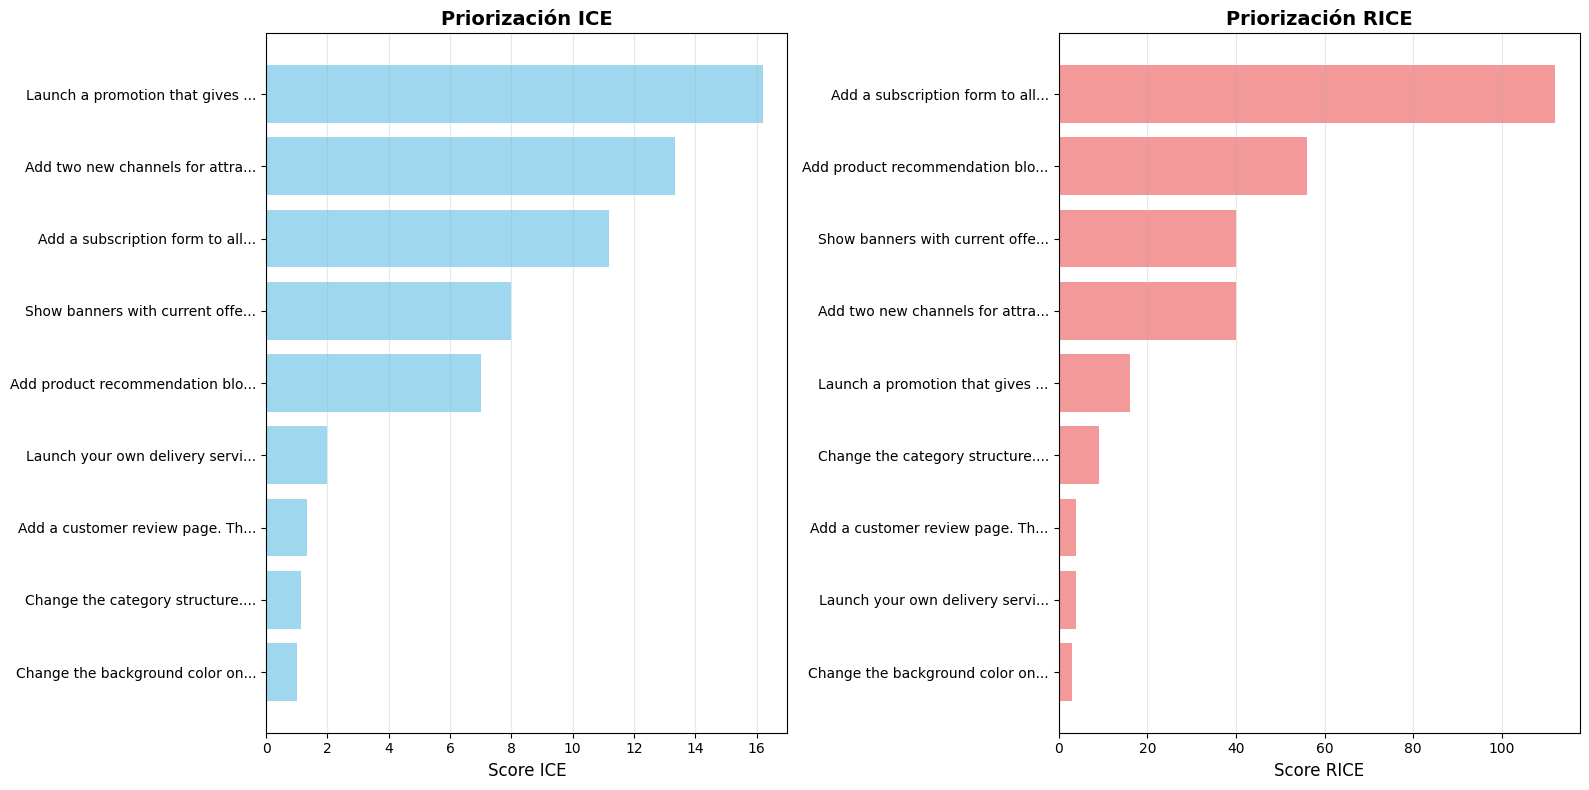

In [7]:
# Grafico 
# Configurar el estilo
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# ICE ranking (ordenado de mayor a menor)
ice_sorted = hipotesis.sort_values('ICE', ascending=True)
bars1 = ax1.barh(range(len(ice_sorted)), ice_sorted['ICE'], color='skyblue', alpha=0.8)
ax1.set_yticks(range(len(ice_sorted)))
ax1.set_yticklabels([h[:30] + '...' if len(h) > 30 else h for h in ice_sorted['hypothesis']], fontsize=10)
ax1.set_title('Priorización ICE', fontsize=14, fontweight='bold')
ax1.set_xlabel('Score ICE', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# RICE ranking (ordenado de mayor a menor)
rice_sorted = hipotesis.sort_values('RICE', ascending=True)
bars2 = ax2.barh(range(len(rice_sorted)), rice_sorted['RICE'], color='lightcoral', alpha=0.8)
ax2.set_yticks(range(len(rice_sorted)))
ax2.set_yticklabels([h[:30] + '...' if len(h) > 30 else h for h in rice_sorted['hypothesis']], fontsize=10)
ax2.set_title('Priorización RICE', fontsize=14, fontweight='bold')
ax2.set_xlabel('Score RICE', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

En el grafico observamos las hipotesis en el eje Y y sus scores en el eje X cada  grafico representa las formulas de priorizacion de hipotesis. En el lado izquierdo tenemos priorizacion de ICE  y en el lado derecho tenemos priorizacion RICE. Podemos ver cual es la hipotesis #1 para cada una. Por lo tanto, el grafico nos indica cual de ellas necesita mayor priorizacion segun sus valores de acuerdo a cada formula.

### Parte 2

Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv. 
Verificar si hay visitantes que entran en ambos grupos(A y B).


In [8]:
#leer archivos

orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

orders = orders.rename(columns={
    'transactionId':'transaction_id',
    'visitorId':'visitor_id'
})

display(orders.head())
orders.info()
print('\n')
display(visits.head())
visits.info()


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1197 non-null   int64  
 1   visitor_id      1197 non-null   int64  
 2   date            1197 non-null   object 
 3   revenue         1197 non-null   float64
 4   group           1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB




,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
#Verificar valores nulos y duplicados

print(orders.duplicated().sum())
print(orders.isna().sum())

print(visits.duplicated().sum())
print(visits.isna().sum())

0
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64
0
date      0
group     0
visits    0
dtype: int64


In [10]:
#Convertir los datos tipo object a date

orders['date'] = pd.to_datetime(orders['date'],format='%Y/%m/%d')
visits['date'] = pd.to_datetime(visits['date'],format='%Y/%m/%d')

orders.info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
#Verificar si hay visitantes en ambos grupos(a-b)
visitors_A = set(orders[orders['group'] == 'A']['visitor_id'].unique())
visitors_B = set(orders[orders['group'] == 'B']['visitor_id'].unique())

duplicated_visitors = visitors_A & visitors_B

print(f"Usuarios unicos en grupo A: {len(visitors_A)}")
print(f"Usuarios únicos en grupo B: {len(visitors_B)}")
print(f"Usuarios que aparecen en ambos grupos: {len(duplicated_visitors)}")
print(f"Porcentaje de contaminación: {len(duplicated_visitors)/len(visitors_A | visitors_B)*100:.2f}%")

Usuarios unicos en grupo A: 503
Usuarios únicos en grupo B: 586
Usuarios que aparecen en ambos grupos: 58
Porcentaje de contaminación: 5.63%


Debido que solo el 5.63% de los datos estan contaminados vamos a prodecer con eliminar los duplicados (aquellos visitantes que entraron en ambos grupos). Teniendo como base el 94.47% de los datos para continuar con los analisis de la prueba A/B.

In [12]:
# 2. Eliminar usuarios duplicados de ambos datasets
print("=== ANTES DE LA LIMPIEZA ===")
print(f"Orders originales: {len(orders)}")


# Limpiar orders
clean_orders = orders[~orders['visitor_id'].isin(duplicated_visitors)]


print("\n=== DESPUÉS DE LA LIMPIEZA ===")
print(f"Orders limpias: {len(clean_orders)}")


=== ANTES DE LA LIMPIEZA ===
Orders originales: 1197

=== DESPUÉS DE LA LIMPIEZA ===
Orders limpias: 1016


In [13]:
# 3. Verificar que no hay más duplicados
visitors_A_clean = set(clean_orders[clean_orders['group'] == 'A']['visitor_id'].unique())
visitors_B_clean = set(clean_orders[clean_orders['group'] == 'B']['visitor_id'].unique())

print(f"\nUsuarios únicos grupo A: {len(visitors_A_clean)}")
print(f"Usuarios únicos grupo B: {len(visitors_B_clean)}")
print(f"Solapamiento: {len(visitors_A_clean & visitors_B_clean)}")  


Usuarios únicos grupo A: 445
Usuarios únicos grupo B: 528
Solapamiento: 0


Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.


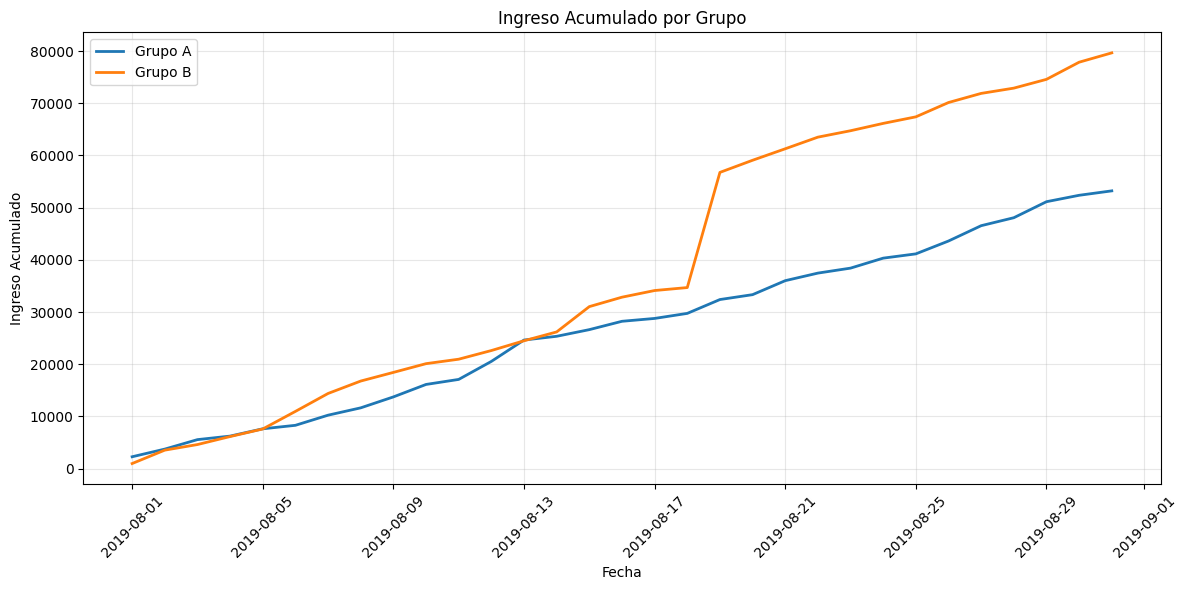

=== ANÁLISIS 20 DE AGOSTO ===
      revenue               visitor_id
          sum    mean count    nunique
group                                 
A       936.0   93.60    10         10
B      2324.6  116.23    20         20

=== MÉTRICAS GENERALES ===
       revenue             visitor_id
           sum        mean    nunique
group                                
A      53212.0  113.700855        445
B      79651.2  145.348905        528


In [14]:
# 1. Preparar datos de ingresos acumulados
daily_revenue = clean_orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

# 2. Calcular ingresos acumulados
daily_revenue = daily_revenue.sort_values('date')
daily_revenue['cumulative_revenue'] = daily_revenue.groupby('group')['revenue'].cumsum()

# 3. Crear el gráfico
plt.figure(figsize=(12, 6))
for group in ['A', 'B']:
    group_data = daily_revenue[daily_revenue['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_revenue'], 
             label=f'Grupo {group}', linewidth=2)

plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analicemos ese "salto" del 20 de agosto
august_20_data = clean_orders[clean_orders['date'] == '2019-08-20']
print("=== ANÁLISIS 20 DE AGOSTO ===")
print(august_20_data.groupby('group').agg({
    'revenue': ['sum', 'mean', 'count'],
    'visitor_id': 'nunique'
}))

# Comparemos métricas generales
print("\n=== MÉTRICAS GENERALES ===")
summary = clean_orders.groupby('group').agg({
    'revenue': ['sum', 'mean'],
    'visitor_id': 'nunique',
    
})
print(summary)

### Comentario
-  Ambos grupos muestran una curva ascendente, lo que indica crecimiento constante en ingresos diarios.
- Grupo B: Mantiene una ventaja sostenida sobre el grupo A en ingresos acumulados, con un salto notable alrededor del 20 de agosto, posiblemente por una campaña, promoción o comportamiento de conversión más eficiente.
- Grupo A: Aunque sigue una trayectoria positiva, su crecimiento es más moderado y no alcanza los niveles de ingreso del grupo B.


Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.


        date group  revenue  transaction_id  avg_order_size
0 2019-08-01     A   2266.6              23       98.547826
1 2019-08-01     B    967.2              17       56.894118
2 2019-08-02     A   1468.3              19       77.278947
3 2019-08-02     B   2568.1              23      111.656522
4 2019-08-03     A   1815.2              24       75.633333


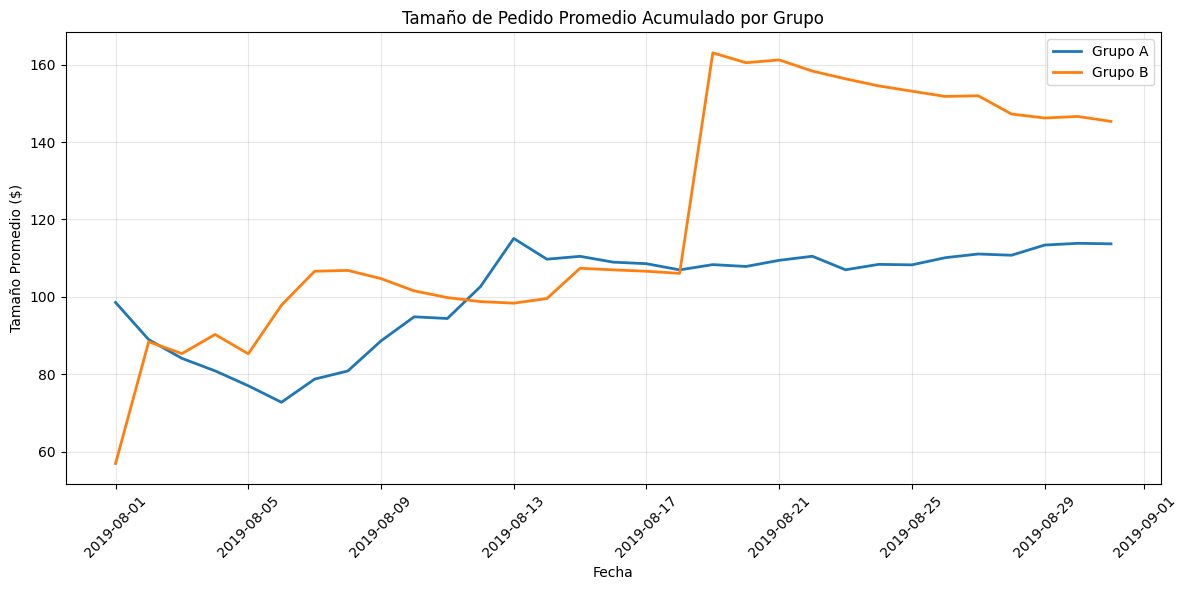

In [15]:
#Agrupar por fecha y grupo para obtener el ingreso diario y la cantidad de pedidos diarios
daily_metrics = clean_orders.groupby(['date', 'group']).agg({
    'revenue': 'sum',
    'transaction_id': 'count'
}).reset_index()

# Una vez tengamos los valores de los ingresos totales y la cantidad de pedidos debemos dividirlos para obtener el promedido de tamano diario
daily_metrics['avg_order_size'] = daily_metrics['revenue'] / daily_metrics['transaction_id']
print(daily_metrics.head())

#Ahora podremos calcular el tamano de pedido promedio ACUMULADO
    #Ordenamos por fecha
daily_metrics = daily_metrics.sort_values('date')
    #calcular la suma acumulada de ingresos y pedido
daily_metrics['cumulative_revenue'] = daily_metrics.groupby('group')['revenue'].cumsum()
daily_metrics['cumulative_orders'] = daily_metrics.groupby('group')['transaction_id'].cumsum()
    # Calcular tamaño de pedido promedio acumulado
daily_metrics['cumulative_avg_order_size'] = daily_metrics['cumulative_revenue'] / daily_metrics['cumulative_orders']

#Grafico
plt.figure(figsize=(12, 6))
for group in ['A', 'B']:
    group_data = daily_metrics[daily_metrics['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_avg_order_size'],
             label=f'Grupo {group}', linewidth=2)

plt.title('Tamaño de Pedido Promedio Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño Promedio ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



- Grupo B mantiene consistentemente un tamaño de pedido promedio más alto que el grupo A.
- Hay un salto significativo alrededor del 17 de agosto en el grupo B, que luego se estabiliza en un nivel superior.
- Grupo A muestra una evolución más gradual, con fluctuaciones pero sin alcanzar los niveles del grupo B.
- Se pudiera sugerir que este pico en el grupo B alrededor del 17 de agosto se debe a un inicio de de campana o una fecha especial. En relacion al grupo A se puede decir que tiene un comportamiento mas o menos estable lo que pudiera indicar un un target homogeneo o menos incentivada.
- El grupo B no solo genera más ingresos acumulados, sino que cada pedido vale más, lo que refuerza su ventaja estratégica.
- Este patrón sugiere que optimizar el tamaño de pedido puede ser tan importante como aumentar la conversión.


Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

Valores finales por grupo:
group
A    113.700855
B    145.348905
Name: cumulative_avg_order_size, dtype: float64

Grupo A (control): $113.70
Grupo B (tratamiento): $145.35
Diferencia relativa: 27.83%


/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128230 missing from current font.
  font.set_text(s, 0, flags=flags)


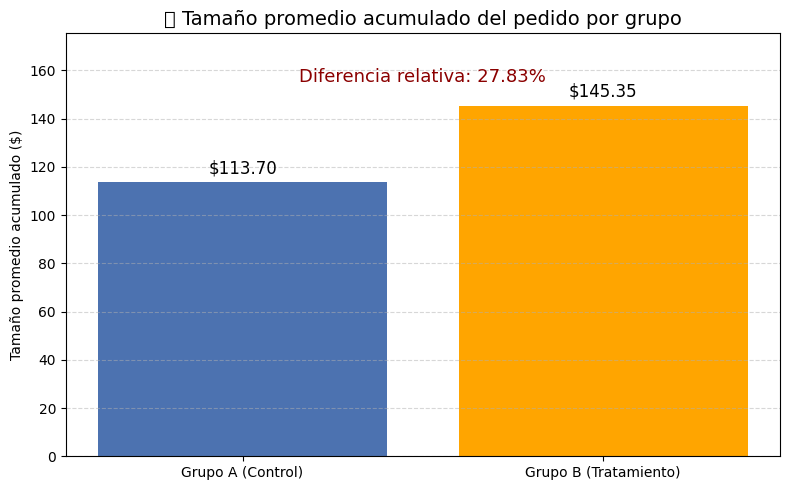

In [16]:

     #Obtener el último valor de tamaño promedio acumulado para cada grupo
final_values = daily_metrics.groupby('group')['cumulative_avg_order_size'].last()
print("Valores finales por grupo:")
print(final_values)

    #Extraer valores finales
grupo_a_final = final_values['A']  # Grupo base (control)
grupo_b_final = final_values['B']  # Grupo tratamiento

    #Calcular diferencia relativa
diferencia_relativa = ((grupo_b_final - grupo_a_final) / grupo_a_final) * 100

print(f"\nGrupo A (control): ${grupo_a_final:.2f}")
print(f"Grupo B (tratamiento): ${grupo_b_final:.2f}")
print(f"Diferencia relativa: {diferencia_relativa:.2f}%")

# Datos
grupos = ['Grupo A (Control)', 'Grupo B (Tratamiento)']
valores = [grupo_a_final, grupo_b_final]
colores = ['#4C72B0', 'orange']

# Gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(grupos, valores, color=colores)

# Anotar valores
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"${yval:.2f}", ha='center', va='bottom', fontsize=12)

# Anotar diferencia relativa
plt.text(0.5, max(valores) + 10, f"Diferencia relativa: {diferencia_relativa:.2f}%", ha='center', fontsize=13, color='darkred')

# Estética
plt.title("📦 Tamaño promedio acumulado del pedido por grupo", fontsize=14)
plt.ylabel("Tamaño promedio acumulado ($)")
plt.ylim(0, max(valores) + 30)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## Comentario

Determinamos el grupo A como el grupo base ya que su comportamiento nos indica que es el grupo mas consistente Y predecibles. Por otra parte, debido al que tamano de muestra entre ambos es similar podemos suponer que por estandar el grupo A es la version orginal y el grupo B suele ser el tratamiento.

Para el grafico podemos apreciar que la diferencia relativa es : el grupo B supera al grupo A por un 27.83% lo que indica que la intervencion que se realizo al grupo B tuvo un impacto positivo.Debido a que la diferencia relativa supero un 15% podemos decir que la diferencia obtenida se considera relevante teniendo en cuenta que estadisticamente y estrategicamente influye en un aumento proporcional en ingresos.


Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.


        date group  visits  pedidos  tasa_conversion
0 2019-08-01     A     719       24         0.033380
1 2019-08-02     A     619       20         0.032310
2 2019-08-03     A     507       24         0.047337
3 2019-08-04     A     717       16         0.022315
4 2019-08-05     A     756       25         0.033069
       count      mean       std       min       25%       50%       75%  \
group                                                                      
A       31.0  0.030651  0.009895  0.016103  0.023167  0.027950  0.038051   
B       31.0  0.035257  0.011264  0.012212  0.027664  0.035714  0.042343   

            max  
group            
A      0.053419  
B      0.062331  


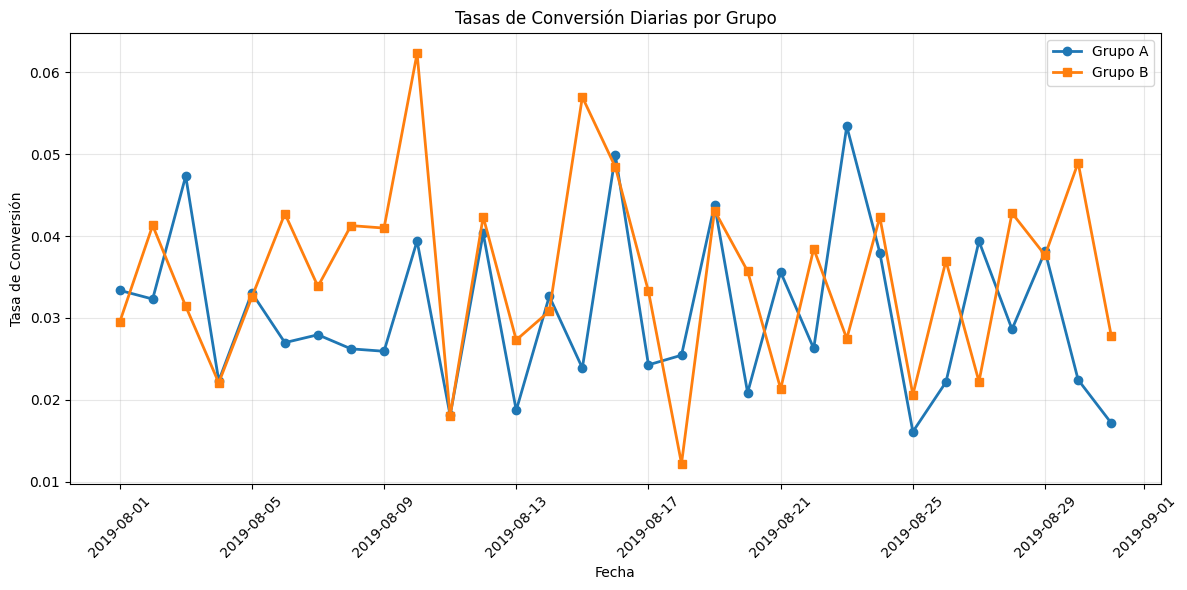

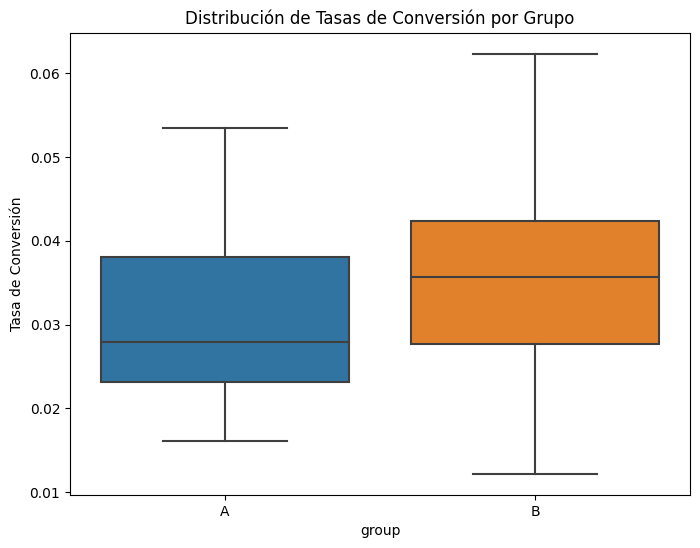

In [17]:
# Agrupar pedidos por fecha y grupo
pedidos_diarios = orders.groupby(['date', 'group']).size().reset_index(name='pedidos')
# Combinar visitas y pedidos por fecha y grupo
conversion_data = visits.merge(pedidos_diarios, on=['date', 'group'], how='left')

# Llenar con 0 los días sin pedidos
conversion_data['pedidos'] = conversion_data['pedidos'].fillna(0)

# Calcular tasa de conversión por día
conversion_data['tasa_conversion'] = conversion_data['pedidos'] / conversion_data['visits']

print(conversion_data.head())

# Resumen por grupo
print(conversion_data.groupby('group')['tasa_conversion'].describe())

# Configurar el estilo
plt.figure(figsize=(12, 6))

# Separar los datos por grupo
grupo_a = conversion_data[conversion_data['group'] == 'A']
grupo_b = conversion_data[conversion_data['group'] == 'B']

# Crear el gráfico de líneas
plt.plot(grupo_a['date'], grupo_a['tasa_conversion'], 
         label='Grupo A', marker='o', linewidth=2)
plt.plot(grupo_b['date'], grupo_b['tasa_conversion'], 
         label='Grupo B', marker='s', linewidth=2)

plt.title('Tasas de Conversión Diarias por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=conversion_data, x='group', y='tasa_conversion')
plt.title('Distribución de Tasas de Conversión por Grupo')
plt.ylabel('Tasa de Conversión')
plt.show()

## Comentario

Podemos observar el primer grafico que en ambos grupos tienen fluctuaciones, se puede decir que e sun comportamiento normal ya que estamos evaluando la tasa de conversion diariamente. Por otro lado,  notamos que ambos parecen tener el mismo comportamiento con la diferencia que el grupo B tiene valores mas altos y bajos.

En relacion, al segundo grafico observamos que el grupo B parece tener una mediana ligeramente más alta que el grupo A, el grupo B también muestra una distribución más concentrada (caja más pequeña)  y que ambos grupos tienen algunos valores atípicos

Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

      visitor_id group  transaction_id
0        5114589     B               1
1        6958315     B               1
2        8300375     A               1
3        8300375     B               1
4       11685486     A               1
...          ...   ...             ...
1084  4266935830     B               1
1085  4278982564     A               1
1086  4279090005     B               1
1087  4281247801     B               1
1088  4283872382     B               1

[1089 rows x 3 columns]


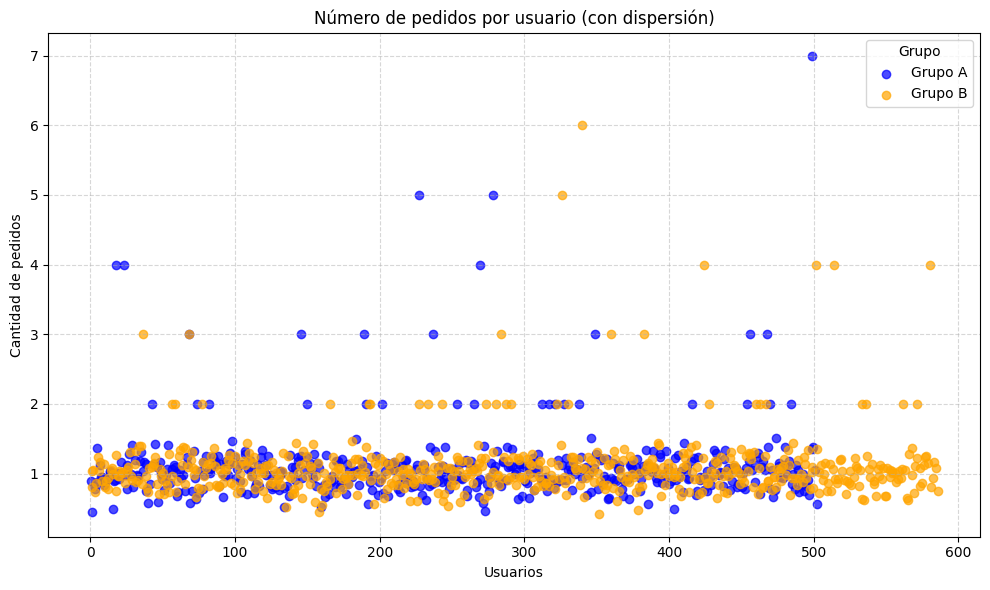

In [18]:
#creamos un dataset para contar los pedidos por usuarios
pedidos_por_usuario = orders.groupby(['visitor_id','group'])['transaction_id'].count().reset_index()
print(pedidos_por_usuario)
#separamos por grupo
grupo_a_orders = pedidos_por_usuario[pedidos_por_usuario['group'] == 'A']
grupo_b_orders = pedidos_por_usuario[pedidos_por_usuario['group'] == 'B']



# Crear copia para no modificar el original
group_a_plot = grupo_a_orders.copy()
group_b_plot = grupo_b_orders.copy()

# Aplicar jitter en Y solo a los usuarios con 1 pedido
group_a_plot['y_jitter'] = group_a_plot['transaction_id'] + np.where(
    group_a_plot['transaction_id'] == 1,
    np.random.normal(0, 0.2, size=len(group_a_plot)),
    0
)

group_b_plot['y_jitter'] = group_b_plot['transaction_id'] + np.where(
    group_b_plot['transaction_id'] == 1,
    np.random.normal(0, 0.2, size=len(group_b_plot)),
    0
)

# Jitter en X para dispersión horizontal
jitter_a_x = np.random.normal(0, 0.3, size=len(group_a_plot))
jitter_b_x = np.random.normal(0, 0.3, size=len(group_b_plot))

# Gráfico
plt.figure(figsize=(10, 6))
plt.title('Número de pedidos por usuario (con dispersión)')
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de pedidos')

# Grupo A
plt.scatter(np.arange(len(group_a_plot)) + jitter_a_x, group_a_plot['y_jitter'],
            color='blue', label='Grupo A', alpha=0.7)

# Grupo B
plt.scatter(np.arange(len(group_b_plot)) + jitter_b_x, group_b_plot['y_jitter'],
            color='orange', label='Grupo B', alpha=0.7)

# Leyenda y estética
plt.legend(title='Grupo')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Comentario

Observamos en el grafico de dispersion que los usuarios con un solo numero de pedido se agrupan en una linea horizontal. Esto nos revela que la mayoria de los usuarios realizan un solo pedido, este comportamiento aplica para ambos grupos. Tanto en el grupo A y B suelen comprar un pedido.

Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [19]:

# Calcular percentiles
p95 = pedidos_por_usuario['transaction_id'].quantile(0.95)
p99 = pedidos_por_usuario['transaction_id'].quantile(0.99)

print(f"Percentil 95: {p95:.2f}")
print(f"Percentil 99: {p99:.2f}")

# Definir umbral de anomalía
umbral_anomalia = p99

# Filtrar usuarios anómalos
usuarios_anomalos = pedidos_por_usuario[pedidos_por_usuario['transaction_id'] > umbral_anomalia]

print("\nUsuarios con comportamiento anómalo:")
print(usuarios_anomalos)


Percentil 95: 2.00
Percentil 99: 4.00

Usuarios con comportamiento anómalo:
      visitor_id group  transaction_id
511   2038680547     A               5
596   2378935119     B               5
618   2458001652     A               5
619   2458001652     B               6
1079  4256040402     A               7


Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

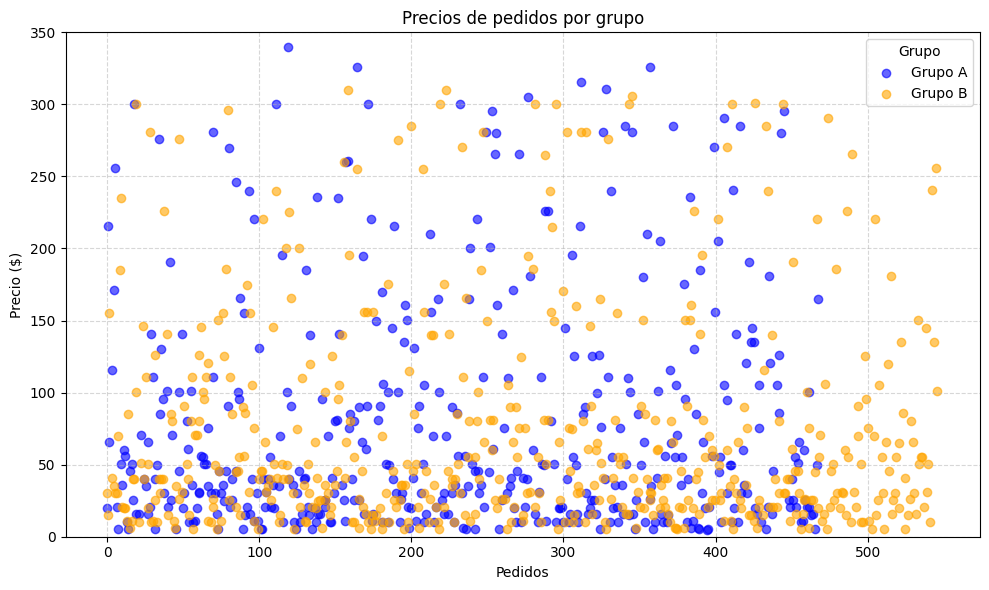

In [20]:
# Jitter en X para dispersar visualmente los puntos
jitter_x = np.random.normal(0, 0.3, size=len(clean_orders))

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.title("Precios de pedidos por grupo")
plt.xlabel("Pedidos")
plt.ylabel("Precio ($)")
plt.ylim(0, 350)
# Grupo A
grupo_a = clean_orders[clean_orders['group'] == 'A']
plt.scatter(np.arange(len(grupo_a)) + jitter_x[:len(grupo_a)],
            grupo_a['revenue'],
            color='blue', alpha=0.6, label='Grupo A')

# Grupo B
grupo_b = clean_orders[clean_orders['group'] == 'B']
plt.scatter(np.arange(len(grupo_b)) + jitter_x[:len(grupo_b)],
            grupo_b['revenue'],
            color='orange', alpha=0.6, label='Grupo B')

# Leyenda y estética
plt.legend(title='Grupo')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



## Comentario 

Podemos apreciar qque los pedidos individuales del grupo A y grupo B se concentran en el rango de precio hasta 50 dolares. Tenemos pedidos que superan los 100 dolares pero si detallamos el grafico podemos observar que los pedidos son menos frecuentes cuando superan los 250$.No hay una diferencia notable entre el grupo A y B


Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [21]:
p95_revenue = clean_orders['revenue'].quantile(0.95)
p99_revenue = clean_orders['revenue'].quantile(0.99)

print(f"Percentil 95: {p95_revenue:.2f}")
print(f"Percentil 99: {p99_revenue:.2f}")

# Definir umbral de anomalía
umbral_anomalia_revenue = p99_revenue

# Filtrar usuarios anómalos
precios_anomalos = clean_orders[clean_orders['revenue'] > umbral_anomalia_revenue]


print("\nCompradores con comportamiento anómalo:")
print(precios_anomalos)


Percentil 95: 414.27
Percentil 99: 830.30

Compradores con comportamiento anómalo:
      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  19920.4     B
743       3603576309  4133034833 2019-08-09   1050.0     A
744       3668308183   888512513 2019-08-27   1335.6     B
940       2420050534  4003628586 2019-08-08    905.8     B
949       1347999392   887908475 2019-08-21    930.0     A
1099       316924019   148427295 2019-08-12   1015.9     A
1103      1348774318  1164614297 2019-08-12   1025.8     A
1136       666610489  1307669133 2019-08-13   1425.8     A
1196      3936777065  2108080724 2019-08-15   3120.1     B


## Comentario

Viendo que el 95% de la compras son igual o menos que 414.27 $ y que el 99% es igual o menos que 830.30 $ tenemos que el 1% de los resultados nos arrojo 9 compradores con pedidos extremos. Por ejemplo, observamos el outlier mas extremo de 19.920,4 $. Tambien nos damos cuenta que estos outliers corresponde entre las fechas del 08 y 27 de agosto de 2019, lo cual pudiera coincidir con una fecha de campana. Sin embargo, entre los valores atipicos podemos ver que ambos grupos (A-B) tienen presencia.

Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.


In [24]:

#Para tasa de conversion debes obtener el numero de usuarios que visitaron y el numero de usuario que realizaron una accion. Ya que quieres ver la tasa de conversion de ambos grupo se debe realizar la misma operacion para los grupo con la condicionate group 'X'
#Grupo A
visits_total_a = visits[visits['group'] == 'A']['visits'].sum()
compradores_a = orders[orders['group'] == 'A']['transaction_id'].count()
tasa_conversion_a = compradores_a / visits_total_a
#Grupo B
visits_total_b = visits[visits['group'] == 'B']['visits'].sum()
compradores_b = orders[orders['group'] == 'B']['transaction_id'].count()
tasa_conversion_b = compradores_b / visits_total_b

print(f'-----DATOS EN BRUTO-----')
print(f"Grupo A - Visitas totales: {visits_total_a}")
print(f"Grupo A - Compradores: {compradores_a}")
print(f"Grupo A - Tasa de conversión: {tasa_conversion_a:.4f}")
print()
print(f"Grupo B - Visitas totales: {visits_total_b}")
print(f"Grupo B - Compradores: {compradores_b}")
print(f"Grupo B - Tasa de conversión: {tasa_conversion_b:.4f}")

# Ahora se psuede calcular la significancia estadistica 
alpha = .05

compradores_datos_brutos = np.array([557,640])
visitantes_datos_brutos = np.array([18736,18916])


p1_datos_brutos = compradores_datos_brutos[0]/visitantes_datos_brutos[0]
p2_datos_brutos = compradores_datos_brutos[1]/visitantes_datos_brutos[1]

p_combinados = ( compradores_datos_brutos[0] + compradores_datos_brutos[1])/ (visitantes_datos_brutos[0] + visitantes_datos_brutos[1])

diferencia_1 = p1_datos_brutos - p2_datos_brutos


z_value_datos_brutos = diferencia_1 / mth.sqrt(p_combinados * (1 - p_combinados) * (1/visitantes_datos_brutos[0] + 1/visitantes_datos_brutos[1]))

distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value_datos_brutos))) * 2
print('\n')
print(f"p-value: {p_value:.2e}")

if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

-----DATOS EN BRUTO-----
Grupo A - Visitas totales: 18736
Grupo A - Compradores: 557
Grupo A - Tasa de conversión: 0.0297

Grupo B - Visitas totales: 18916
Grupo B - Compradores: 640
Grupo B - Tasa de conversión: 0.0338


p-value: 2.32e-02
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones


H0 = no hay diferencia significativa entre las proporciones
H1 = si hay diferencia significativa entre las proporciones

 ## Comentario

 Trabajmos con el dataset orders ya que pedian calcular la significacion estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. El resultado nos arrojo que existe una diferencia entre las proporciones de los grupo a y b.Por lo tanto, podemos sugerir que utilizando el dataset original, sin limpieza y prepacion de datos.

Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.


In [25]:
# Primero debemos verificar normalidad de los datos de revenue: Es necesario realizar una prueba de Shapiro para determinar si la prueba a ejecutar es una prueba t o una prueba u

# Separar datos por grupo
revenue_a = orders[orders['group'] == 'A']['revenue']
revenue_b = orders[orders['group'] == 'B']['revenue']

#Pruebas estadísticas
print("=== PRUEBAS DE NORMALIDAD ===")
print("\nGrupo A:")
stat_a, p_value_a = shapiro(revenue_a)
print(f"Shapiro-Wilk: estadístico={stat_a:.4f}, p-value={p_value_a:.2e}")

print("\nGrupo B:")
stat_b, p_value_b = shapiro(revenue_b)
print(f"Shapiro-Wilk: estadístico={stat_b:.4f}, p-value={p_value_b:.2e}")

# Interpretación
alpha = 0.05
print(f"\n=== INTERPRETACIÓN (α = {alpha}) ===")
if p_value_a < alpha:
    print("Grupo A: Los datos NO siguen distribución normal")
else:
    print("Grupo A: Los datos siguen distribución normal")
    
if p_value_b < alpha:
    print("Grupo B: Los datos NO siguen distribución normal")
else:
    print("Grupo B: Los datos siguen distribución normal")

=== PRUEBAS DE NORMALIDAD ===

Grupo A:
Shapiro-Wilk: estadístico=0.5799, p-value=1.67e-34

Grupo B:
Shapiro-Wilk: estadístico=0.0856, p-value=0.00e+00

=== INTERPRETACIÓN (α = 0.05) ===
Grupo A: Los datos NO siguen distribución normal
Grupo B: Los datos NO siguen distribución normal


## Comentario

Considerando que la distribucion de los datos no es normal procederemos a realizar una prueba no parametrica en nuestro caso la Prueba U para calcular la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos 

In [26]:

# Realizar la prueba U de Mann-Whitney
statistic, p_value = mannwhitneyu(revenue_a, revenue_b, alternative='two-sided')
print(f'-----DATOS EN BRUTO-----')
print("=== PRUEBA U DE MANN-WHITNEY ===")
print(f"Estadístico U: {statistic}")
print(f"P-value: {p_value:.6f}")

# Interpretación
alpha = 0.05
print(f"\n=== INTERPRETACIÓN (α = {alpha}) ===")
if p_value < alpha:
    print("HAY diferencia significativa entre los grupos")
    print("Rechazamos H0: las distribuciones son diferentes")
else:
    print("NO hay diferencia significativa entre los grupos")
    print("No rechazamos H0: las distribuciones son similares")

# Estadísticas descriptivas
print(f"\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(f"Mediana Grupo A: ${revenue_a.median():.2f}")
print(f"Mediana Grupo B: ${revenue_b.median():.2f}")

-----DATOS EN BRUTO-----
=== PRUEBA U DE MANN-WHITNEY ===
Estadístico U: 175872.5
P-value: 0.691525

=== INTERPRETACIÓN (α = 0.05) ===
NO hay diferencia significativa entre los grupos
No rechazamos H0: las distribuciones son similares

=== ESTADÍSTICAS DESCRIPTIVAS ===
Mediana Grupo A: $50.10
Mediana Grupo B: $50.35


## Comentario 

- Las distribuciones de AOV(Average Order Value), en espanol tamano promedio de pedido,, entre los dos grupos son estadísticamente similares. Esto en el caso usando el dataset orders sin limpieza de duplicados.

Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.


In [28]:
#En este ejercicio vamos a calcular la tasa de conversion de ambos grupos con la limpieza y prepacion de datos en el dataset:orders
#Grupo A
visits_total_a_1 = visits[visits['group'] == 'A']['visits'].sum()
compradores_a_1 = clean_orders[clean_orders['group'] == 'A']['transaction_id'].count()
tasa_conversion_a_1 = compradores_a_1 / visits_total_a_1
#Grupo B
visits_total_b_1 = visits[visits['group'] == 'B']['visits'].sum()
compradores_b_1 = clean_orders[clean_orders['group'] == 'B']['transaction_id'].count()
tasa_conversion_b_1 = compradores_b_1 / visits_total_b_1

print(f'-----DATOS FILTRADOS-----')
print(f"Grupo A - Visitas totales: {visits_total_a_1}")
print(f"Grupo A - Compradores: {compradores_a_1}")
print(f"Grupo A - Tasa de conversión: {tasa_conversion_a_1:.4f}")
print()
print(f"Grupo B - Visitas totales: {visits_total_b_1}")
print(f"Grupo B - Compradores: {compradores_b_1}")
print(f"Grupo B - Tasa de conversión: {tasa_conversion_b_1:.4f}")

#calcular la significacion estadistica 
alpha = .05

compradores = np.array([468,548])
visitantes = np.array([18736,18916])


p1 = compradores[0]/visitantes[0]
p2 = compradores[1]/visitantes[1]

p_combined = ( compradores[0] + compradores[1])/ (visitantes[0] + visitantes[1])

diferencia = p1 - p2


z_value = diferencia / mth.sqrt(p_combined * (1 - p_combined) * (1/visitantes[0] + 1/visitantes[1]))

distr_1 = st.norm(0, 1) 

p_value = (1 - distr_1.cdf(abs(z_value))) * 2
print('\n')
print(f"p-value: {p_value:.2e}")

if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")


-----DATOS FILTRADOS-----
Grupo A - Visitas totales: 18736
Grupo A - Compradores: 468
Grupo A - Tasa de conversión: 0.0250

Grupo B - Visitas totales: 18916
Grupo B - Compradores: 548
Grupo B - Tasa de conversión: 0.0290


p-value: 1.69e-02
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones


H0 = no hay diferencia significativa entre las proporciones
H1 = si hay diferencia significativa entre las proporciones

## Comentario

Al calcular la signicacion entre la proporcion de ambos grupo la prueba Z nos indica qque debemos rechazar la hipotesis nula y que si existe una diferencia significativa. Debemos tener en cuwnta que el margen de alpha que establecimos es:.05.

En consecuencia, podemos decir que la diferencia es lo bastante grande para no atribuirla al azar. 

Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.


In [31]:
# Verificar normalidad de los datos de revenue: Es necesario realizar una prueba de Shapiro para determinar si la prueba a ejecutar es una prueba t o una prueba u

# Separar datos por grupo
revenue_a_1 = clean_orders[clean_orders['group'] == 'A']['revenue']
revenue_b_1 = clean_orders[clean_orders['group'] == 'B']['revenue']

#Pruebas estadísticas
print("=== PRUEBAS DE NORMALIDAD ===")
print("\nGrupo A:")
stat_a_1, p_value_a_1 = shapiro(revenue_a_1)
print(f"Shapiro-Wilk: estadístico={stat_a_1:.4f}, p-value={p_value_a_1:.2e}")

print("\nGrupo B:")
stat_b_1, p_value_b_1 = shapiro(revenue_b_1)
print(f"Shapiro-Wilk: estadístico={stat_b_1:.4f}, p-value={p_value_b_1:.2e}")

# Interpretación
alpha = 0.05
print(f"\n=== INTERPRETACIÓN (α = {alpha}) ===")
if p_value_a_1 < alpha:
    print("Grupo A: Los datos NO siguen distribución normal")
else:
    print("Grupo A: Los datos siguen distribución normal")
    
if p_value_b_1 < alpha:
    print("Grupo B: Los datos NO siguen distribución normal")
else:
    print("Grupo B: Los datos siguen distribución normal")

=== PRUEBAS DE NORMALIDAD ===

Grupo A:
Shapiro-Wilk: estadístico=0.6052, p-value=2.77e-31

Grupo B:
Shapiro-Wilk: estadístico=0.0803, p-value=4.20e-45

=== INTERPRETACIÓN (α = 0.05) ===
Grupo A: Los datos NO siguen distribución normal
Grupo B: Los datos NO siguen distribución normal


In [32]:
## Tomando en cuenta que los datos no sigue una distribucion normal procederemos con la prueba U

# Realizar la prueba U de Mann-Whitney
statistic_1, p_value_1 = mannwhitneyu(revenue_a_1, revenue_b_1, alternative='two-sided')

print(f'-----DATOS FILTRADOS-----')
print("=== PRUEBA U DE MANN-WHITNEY ===")
print(f"Estadístico U: {statistic_1}")
print(f"P-value: {p_value_1:.6f}")

# Interpretación
alpha = 0.05
print(f"\n=== INTERPRETACIÓN (α = {alpha}) ===")
if p_value_1 < alpha:
    print("HAY diferencia significativa entre los grupos")
    print("Rechazamos H0: las distribuciones son diferentes")
else:
    print("NO hay diferencia significativa entre los grupos")
    print("No rechazamos H0: las distribuciones son similares")

# Estadísticas descriptivas
print(f"\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(f"Mediana Grupo A: ${revenue_a_1.median():.2f}")
print(f"Mediana Grupo B: ${revenue_b_1.median():.2f}")

-----DATOS FILTRADOS-----
=== PRUEBA U DE MANN-WHITNEY ===
Estadístico U: 129041.5
P-value: 0.862233

=== INTERPRETACIÓN (α = 0.05) ===
NO hay diferencia significativa entre los grupos
No rechazamos H0: las distribuciones son similares

=== ESTADÍSTICAS DESCRIPTIVAS ===
Mediana Grupo A: $50.10
Mediana Grupo B: $45.90


Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

En consideracion a las pruebas se psuede dar como lider al grupo B por ende se puede parar la prueba.

El grupo B demuestra una ventaja clara en conversión e ingresos, pero no por tener precios más altos ni compradores más frecuentes. Su rendimiento se explica por:
- Mayor eficiencia de conversión: convierte más visitas en compras.
- Pedidos de alto valor dispersos: elevan el promedio acumulado sin alterar la distribución general.
- Menor frecuencia por usuario: sus compradores compran menos veces, pero con mayor impacto por transacción.
